Rawan Abdellah 
-------------

In [59]:
#the environment of the robot as a dictionary
environment = {
        'B1': ['B1way', 'B2'],
        'B2': ['B1', 'B3'],
        'B3': ['B2'],
        'D1': ['D1way'],
        'D2': ['D2way'],
        'D3': ['D3way'],
        'D1way': ['D1','B1way','D2way'],
        'D2way': ['D2','D1way','D3way'],
        'D3way': ['D3','D2way'],
        'B1way': ['D1way','B1','start'],
        'start': ['B1way']
        }

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#graph function to draw the environment in a graph using networkx 


def Graph(nodes,red_edges=[],title='',visited_boxes=[],existed_boxes_init=[]):
    plt.figure(3,figsize=(12,12)) 

    li = []
    red_edges2 = []
    for index , k in enumerate(red_edges[:-1]):
        red_edges2.append((red_edges[index],red_edges[index+1]))
    val_map = {}
    pos = {}
    for index , k in enumerate(nodes.keys()):
        if k in visited_boxes:
            val_map[k] =.5
        elif k in existed_boxes_init:
            val_map[k] =.5
        else:
            val_map[k] =.3

        pos[k] = (index,index+1)
        for val in nodes[k]:
            li.append((k,val))
    G = nx.DiGraph(random_state=42)
    G.add_edges_from(li)

    values = [val_map.get(node, 1) for node in G.nodes()]

    red_edges = red_edges2
    edge_colours = ['black' if not edge in red_edges else 'red'
                    for edge in G.edges()]
    black_edges = [edge for edge in G.edges() if edge not in red_edges]

    
    pos = nx.spring_layout(G, dim=2, k=1, pos=None, fixed=None, iterations=150, weight='weight', scale=3.0)

    nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                           node_color = values, node_size = 1000,random_state=42)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='k', arrows=True , width=5,style='bold')
    nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
    plt.title(title)
    plt.show()

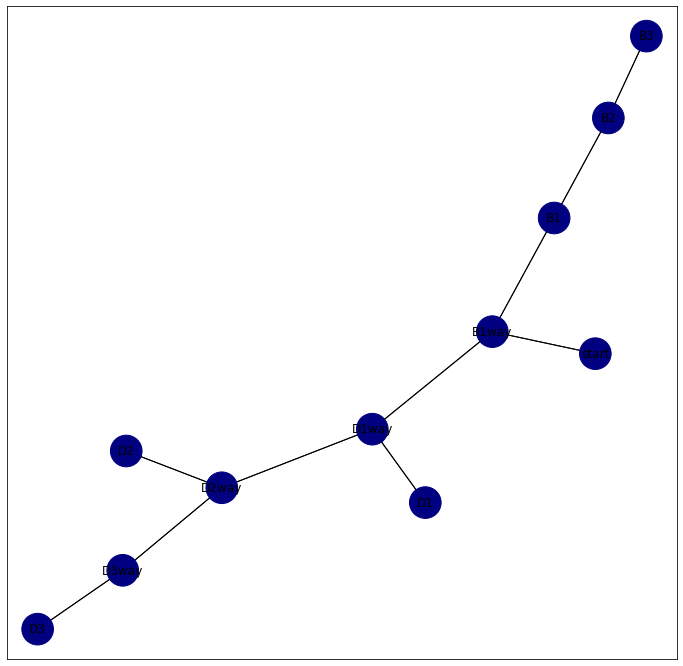

In [62]:
Graph(environment)

In [49]:
from queue import Queue

#search_BFS function to apply BFS algorithm in searching to find the best path in general.
def search_BFS(start,environment):
    level = {}
    visited = {}
    parent = {}
    for i in environment.keys():
        level[i] = -1
        visited[i] = False
        parent[i] = None
    bfs_transfer_output = []
    queue = Queue()

    level[start]=0
    visited[start]=True
    queue.put(start)
    while not queue.empty():

        u = queue.get()
        bfs_transfer_output.append(u)
        for val in environment[u]:
            if not visited[val]:
                visited[val] = True
                parent[val] = u
                level[val] = level[u] + 1
                queue.put(val)
    return parent

In [50]:
#move_to function is the function that makes the BFS suitable in our case 
#because it's searching directly for the elements of the environment
def move_to(v,parent):
    path = []
    while v is not None:
        path.append(v)
        v = parent[v]
    return path

In [51]:
#this is a representation for what search BFS function will return if we used start as a starting point
parent = search_BFS('start',environment)
parent

{'B1': 'B1way',
 'B2': 'B1',
 'B3': 'B2',
 'D1': 'B1way',
 'D2': 'D2way',
 'D3': 'D3way',
 'D1way': 'B1way',
 'D2way': 'D1way',
 'D3way': 'D2way',
 'B1way': 'start',
 'start': None}

In [63]:
#this is a representation for the output of move_to while it taking B1 as a goal.
move_to('B1',parent)

['B1', 'B1way', 'D1way', 'D2way', 'D3way', 'D3']

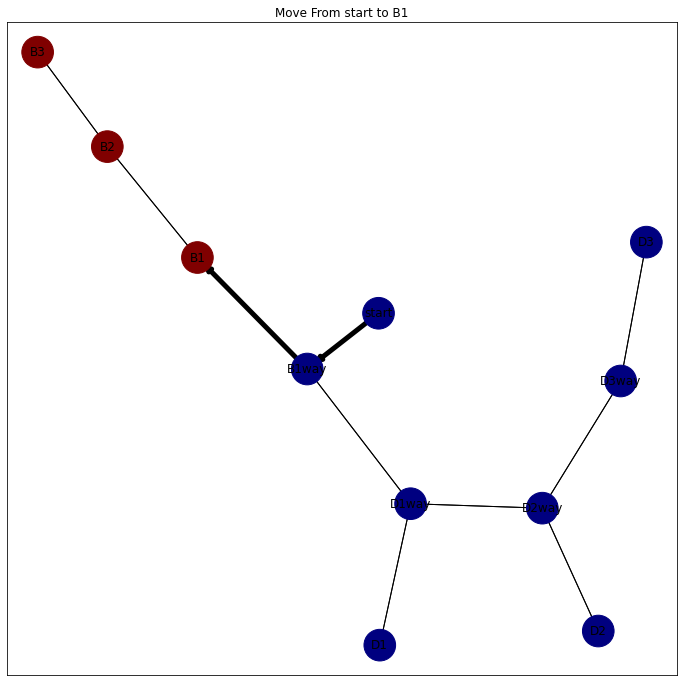

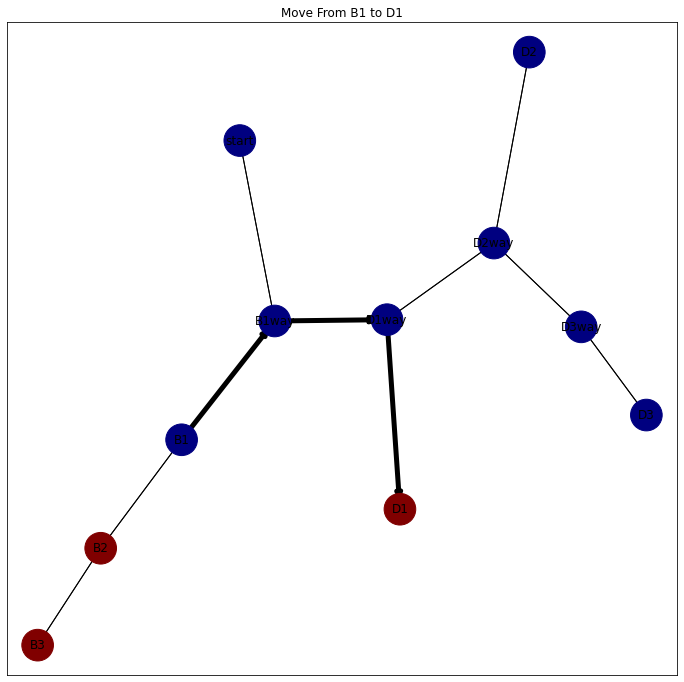

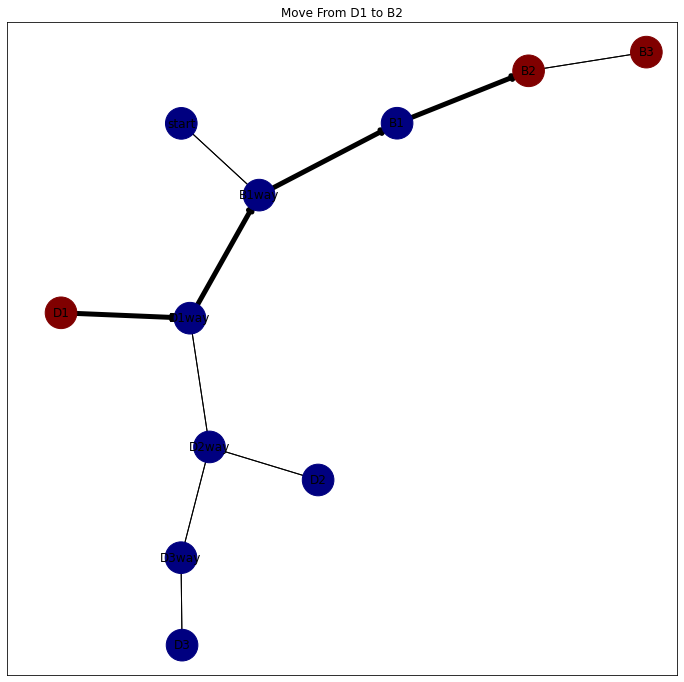

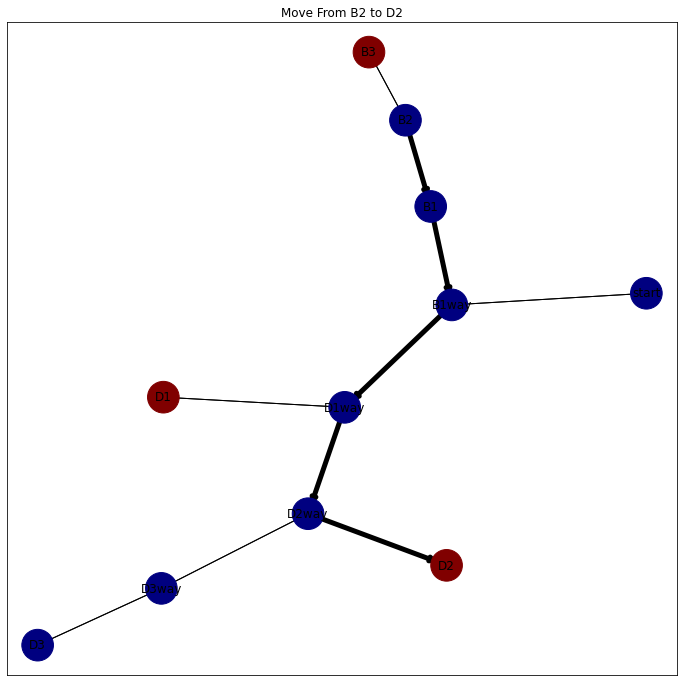

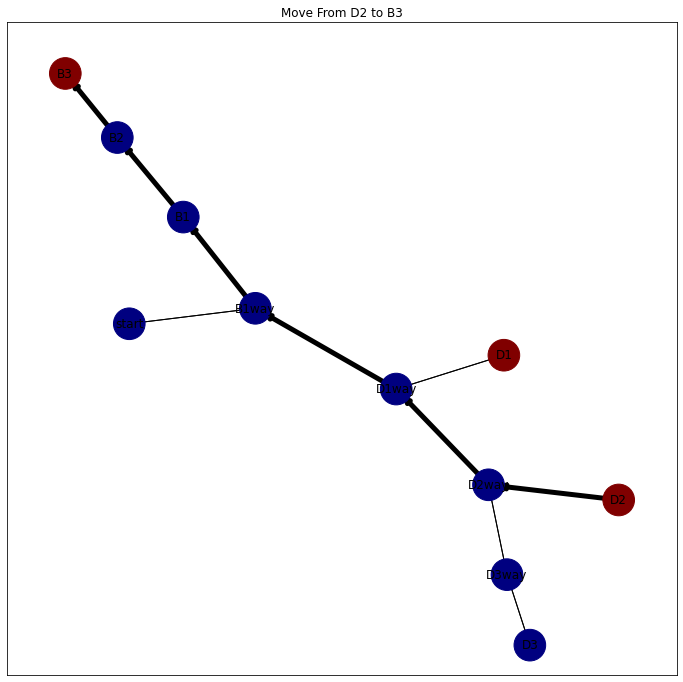

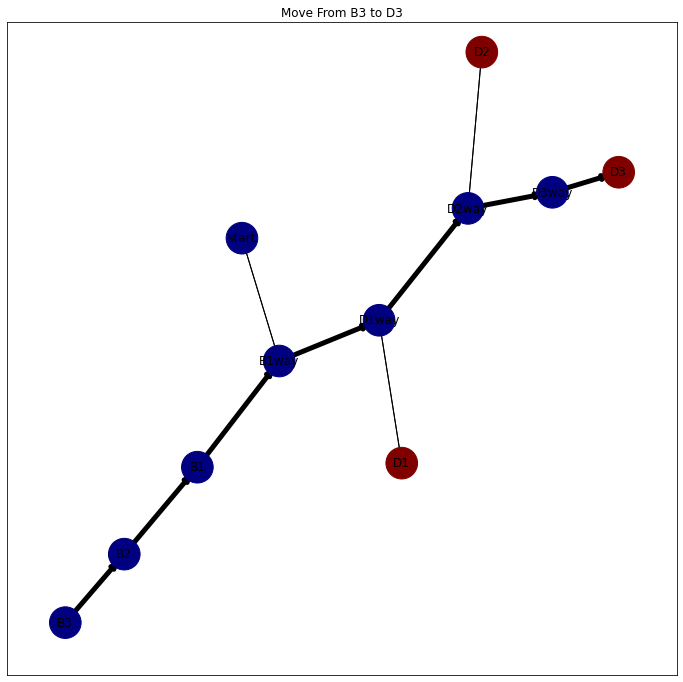

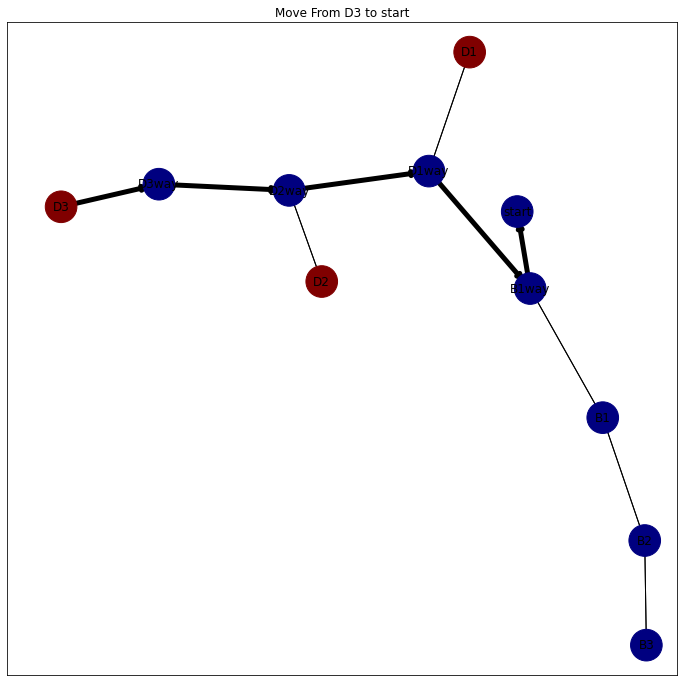

In [64]:

#I determined the starters and enders by order
start_from = ['start','B1','D1','B2','D2','B3','D3']
end_to   = ['B1','D1','B2','D2','B3','D3','start']
existed_boxes = {'D1':False,'D2':False,'D3':False}
existed_boxes_init = {'D1':'B1','D2':'B2','D3':'B3'}
visited_boxes = []
visited_boxes_init = ['B1','B2','B3']
#for loop to represent the graphs while the robot is moving forward to achieve the goal
for start , end in zip(start_from,end_to):
    if end in existed_boxes.keys():
        visited_boxes_init.remove(existed_boxes_init[end])
        existed_boxes[end] == True
        visited_boxes.append(end)
    if end in existed_boxes.keys():
        if existed_boxes[end]:
            visited_boxes.append(end)

    parent = search_BFS(start,environment)
    best_path = move_to(end,parent)
    title = 'Move From '+start+' to '+end
    Graph(environment,best_path[::-1],title,visited_boxes,visited_boxes_init)
